In [1]:
pip install --upgrade git+https://github.com/huggingface/transformers/

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Cloning https://github.com/huggingface/transformers/ to /tmp/pip-req-build-fbob6v01
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers/ /tmp/pip-req-build-fbob6v01
  Resolved https://github.com/huggingface/transformers/ to commit 849367ccf741d8c58aa88ccfe1d52d8636eaf2b7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Depth-Guided Stable Diffusion and 2.1 checkpoints
import torch
import requests
from PIL import Image
from diffusers import StableDiffusionDepth2ImgPipeline

pipe = StableDiffusionDepth2ImgPipeline.from_pretrained(
   "stabilityai/stable-diffusion-2-depth",
   torch_dtype=torch.float16,
).to("cuda")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
init_image = Image.open(requests.get(url, stream=True).raw)

prompt = "two tigers"
n_propmt = "bad, deformed, ugly, bad anotomy"
image = pipe(prompt=prompt, image=init_image, negative_prompt=n_propmt, strength=0.7).images[0]

The cache for model files in Diffusers v0.14.0 has moved to a new location. Moving your existing cached models. This is a one-time operation, you can interrupt it or run it later by calling `diffusers.utils.hub_utils.move_cache()`.


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

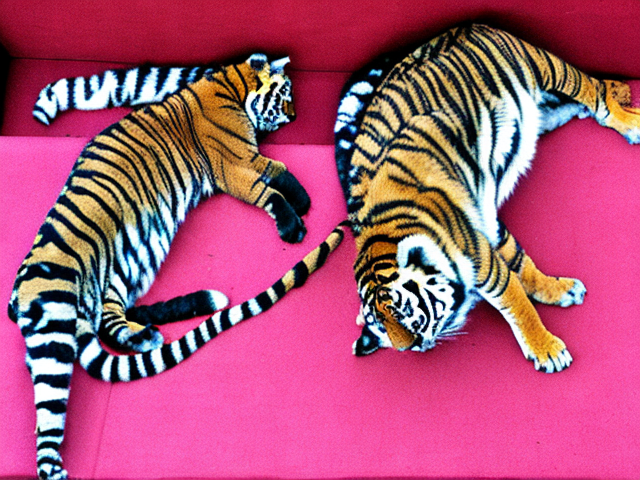

In [3]:
image

In [5]:
# Paint-by-example
import PIL
import requests
import torch
from io import BytesIO
from diffusers import DiffusionPipeline

def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")

img_url = "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/image/example_1.png"
mask_url = "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/mask/example_1.png"
example_url = "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/reference/example_1.jpg"

init_image = download_image(img_url).resize((512, 512))
mask_image = download_image(mask_url).resize((512, 512))
example_image = download_image(example_url).resize((512, 512))

pipe = DiffusionPipeline.from_pretrained("Fantasy-Studio/Paint-by-Example", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

image = pipe(image=init_image, mask_image=mask_image, example_image=example_image).images[0]

unet/diffusion_pytorch_model.safetensors not found
You are using a model of type clip_vision_model to instantiate a model of type clip. This is not supported for all configurations of models and can yield errors.


  0%|          | 0/50 [00:00<?, ?it/s]

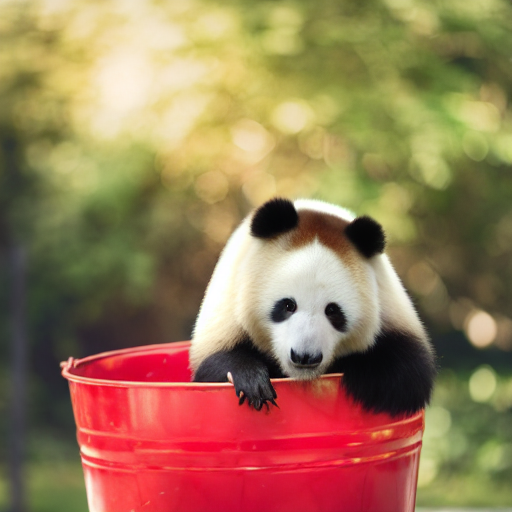

In [6]:
image